In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
df = pd.read_csv('./online-retail.csv', sep=';')

In [26]:
df.head(10)

,InvoiceNo,Description
0,C536383,SET OF 3 COLOURED FLYING DUCKS
1,C536391,PLASTERS IN TIN CIRCUS PARADE
2,C536391,PACK OF 12 PINK PAISLEY TISSUES
3,C536391,PACK OF 12 BLUE PAISLEY TISSUES
4,C536391,PACK OF 12 RED RETROSPOT TISSUES
5,C536391,CHICK GREY HOT WATER BOTTLE
6,C536391,PLASTERS IN TIN VINTAGE PAISLEY
7,C536391,PLASTERS IN TIN SKULLS
8,C536506,JAM MAKING SET WITH JARS
9,C536543,HAND WARMER RED RETROSPOT


In [27]:
df.shape

(9211, 2)

In [28]:
agrupado = df.groupby('InvoiceNo')['Description'].apply(','.join).reset_index()
agrupado['Description'] = agrupado['Description'].str.replace(' ,', ',')
agrupado.head(10)
agrupado.to_csv('transaction.csv', index=False, header=False, sep=',')

In [29]:
df = pd.read_csv('transaction.csv', delimiter = ',', header = None)
df.replace(np.nan, 0, inplace=True)
df.head(10)

,0,1
0,C536383,SET OF 3 COLOURED FLYING DUCKS
1,C536391,"PLASTERS IN TIN CIRCUS PARADE,PACK OF 12 PINK ..."
2,C536506,JAM MAKING SET WITH JARS
3,C536543,"HAND WARMER RED RETROSPOT,CHARLOTTE BAG SUKI D..."
4,C536548,"3 HOOK HANGER MAGIC GARDEN,5 HOOK HANGER MAGIC..."
5,C536606,SET/5 RED RETROSPOT LID GLASS BOWLS
6,C536622,SET 7 BABUSHKA NESTING BOXES
7,C536625,3 TIER CAKE TIN GREEN AND CREAM
8,C536642,MIRRORED DISCO BALL
9,C536734,"LIGHT GARLAND BUTTERFILES PINK,15CM CHRISTMAS ..."


In [30]:
def removeZeros(lista):
    return list(filter(lambda x: x !=0, lista))

In [31]:
listao = []
for index, product in df.iterrows():
    lista = product.values.tolist()
    lista = removeZeros(lista)
    listao.append(lista)
listao[0:3]

[['C536383', 'SET OF 3 COLOURED  FLYING DUCKS'],
 ['C536391',
  'PLASTERS IN TIN CIRCUS PARADE,PACK OF 12 PINK PAISLEY TISSUES,PACK OF 12 BLUE PAISLEY TISSUES,PACK OF 12 RED RETROSPOT TISSUES,CHICK GREY HOT WATER BOTTLE,PLASTERS IN TIN VINTAGE PAISLEY,PLASTERS IN TIN SKULLS'],
 ['C536506', 'JAM MAKING SET WITH JARS']]

In [32]:
TE = TransactionEncoder()
TE_AR = TE.fit(listao).transform(listao)

In [33]:
df = pd.DataFrame(TE_AR, columns=TE.columns_)
df.head(10)

,"50'S CHRISTMAS GIFT BAG LARGE,WOOD 2 DRAWER CABINET WHITE FINISH,RED STAR CARD HOLDER,BAKING SET 9 PIECE RETROSPOT","DOLLY GIRL BEAKER,REGENCY SUGAR BOWL GREEN,REGENCY CAKESTAND 3 TIER","OVAL WALL MIRROR DIAMANTE,PHOTO FRAME 3 CLASSIC HANGING,S/4 PINK FLOWER CANDLES IN BOWL, OVAL WALL MIRROR DIAMANTE,TEA FOR ONE POLKADOT,WOOD 2 DRAWER CABINET WHITE FINISH",SET 2 TEA TOWELS I LOVE LONDON,"SET 2 TEA TOWELS I LOVE LONDON,RECIPE BOX PANTRY YELLOW DESIGN","TRELLIS COAT RACK,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,POPCORN HOLDER",10 COLOUR SPACEBOY PEN,"12 EGG HOUSE PAINTED WOOD,SET OF 2 WOODEN MARKET CRATES",12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,"YELLOW GIANT GARDEN THERMOMETER,BREAD BIN DINER STYLE RED","YELLOW/BLUE RETRO RADIO,HOT WATER BOTTLE I AM SO POORLY,FELTCRAFT PRINCESS OLIVIA DOLL",ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,"ZINC FOLKART SLEIGH BELLS,VINTAGE RED TRIM ENAMEL BOWL,SET OF 4 KNICK KNACK TINS DOILY,BOX OF 6 CHRISTMAS CAKE DECORATIONS,RETROSPOT TEA SET CERAMIC 11 PC","ZINC HEARTS PLANT POT HOLDER,POSTAGE",ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC TOP 2 DOOR WOODEN SHELF
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
valores_k = []
S = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(df)
    valores_k.append(i)
    S.append(metrics.silhouette_score(df, kmeans.labels_))

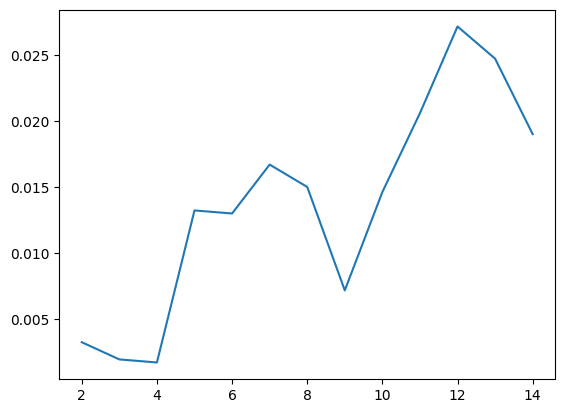

In [35]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(df)
df['Cluster'] = kmeans.labels_
df.to_csv('AGRUPADO.csv', index=False, header = False, sep = ',')

In [38]:
dfassoc = df.drop('Cluster', axis=1)

In [39]:
freq_itemset = apriori(dfassoc, min_support=0.001, use_colnames=True)
freq_itemset.sort_values(by=['support'], ascending=False).head(50)

,support,itemsets
56,0.041622,(Manual)
74,0.017232,(POSTAGE)
81,0.013521,(REGENCY CAKESTAND 3 TIER)
9,0.008484,(AMAZON FEE)
47,0.008218,(JAM MAKING SET WITH JARS)
17,0.006628,(Bank Charges)
75,0.006363,"(POSTAGE,Manual)"
23,0.005302,(CLASSIC GLASS COOKIE JAR)
28,0.004242,(CRUK Commission)
94,0.003977,(SET OF 3 CAKE TINS PANTRY DESIGN )


In [55]:
regras = association_rules(freq_itemset, metric='confidence', min_threshold = 999)
regras.sort_values(by='confidence', ascending=False).drop(columns=['antecedent support', 'consequent support', 'leverage'], axis = 1)

,antecedents,consequents,support,confidence,lift,conviction,zhangs_metric
